# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 05 : Polynomial Regression</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 3rd Aban, 13:00 </font></h1>



B1 * X1 + B2 * X2 + B0

1, X1, X2, X1 ** 2, X2 ** 2, X1 * X2

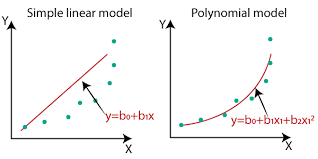

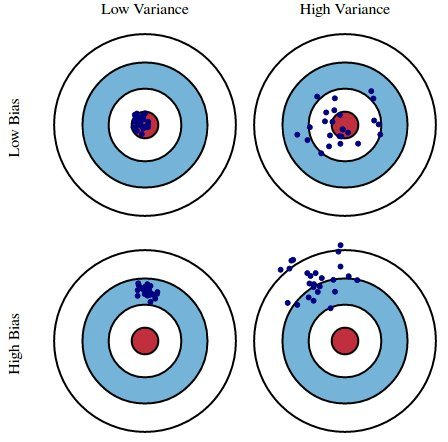

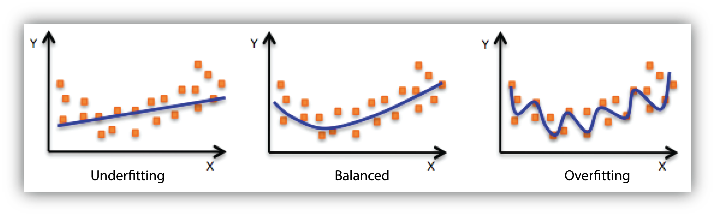

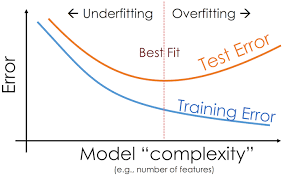

# Step0: Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

# Step1: Read Data

In [5]:
real_estate_df = pd.read_csv('Real estate.csv')

In [6]:
real_estate_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Step2: Data Overview

In [7]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
real_estate_df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Step3: X, y

In [9]:
X = real_estate_df.drop(['No', 'Y house price of unit area'], axis=1)
y = real_estate_df['Y house price of unit area']

In [10]:
X.shape

(414, 6)

In [11]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [12]:
y.shape

(414,)

In [13]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

# Step4: Linear Regression

### train_test_split

In [15]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creat the Model

In [16]:
# for creating LinearRegression
def LinearModel(X_train, y_train):
    
    # from sklearn.linear_model import LinearRegression
    poly_model = LinearRegression()
    # Train
    poly_model.fit(X_train, y_train)
    
    return poly_model

### Train the Model

In [17]:
linear_model = LinearModel(X_train, y_train)

In [87]:
linear_model.predict(test)

C:\Users\Marzie_Thr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Marzie_Thr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([48.02534148])

### Print Coefficient and Intercept 

In [18]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [21]:
coef_df = pd.DataFrame(linear_model.coef_, columns=['Coefficients'], index=['X1 transaction date', 
       'X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

In [22]:
intercept_df = pd.DataFrame(linear_model.intercept_, columns=['Coefficients'], index=['Intercept'])

In [23]:
pd.concat((coef_df, intercept_df))

,Coefficients
X1 transaction date,4.973004
X2 house age,-0.286733
X3 distance to the nearest MRT station,-0.004399
X4 number of convenience stores,1.232185
X5 latitude,243.562821
X6 longitude,1.518267
Intercept,-16234.447509


###  Prediction & Evaluation

In [24]:
# for prediction and evaluation of model
def ModelEvaluation(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    # from sklearn.metrics import mean_absolute_error, mean_squared_error
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    MSE = np.round(mean_squared_error(y_test, y_pred), 2)
    RMSE = np.round(np.sqrt(MSE),2)
    
    return (y_pred, MAE, MSE, RMSE)

In [25]:
y_pred, MAE, MSE, RMSE = ModelEvaluation(linear_model, X_test, y_test)

In [26]:
prediction_df = pd.DataFrame({'Y_Test':y_test, 'Y_Pred':y_pred, 'Residual':y_test-y_pred})
prediction_df.head()

,Y_Test,Y_Pred,Residual
176,19.2,12.304507,6.895493
347,11.2,9.884906,1.315094
307,24.7,21.460539,3.239461
299,46.1,48.470683,-2.370683
391,31.3,31.851676,-0.551676


### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [44]:
metric = pd.DataFrame([MAE, MSE, RMSE])
metric.set_axis(['MAE', 'MSE', 'RMSE'], inplace=True)
metric.set_axis(['Metrics'], axis=1, inplace=True)
metric

,Metrics
MAE,5.20
MSE,44.13
RMSE,6.64


# Step5: PolynomialFeatures

In [45]:
def PolyFeatures(X, degree, include_bias=False):
    
    # from sklearn.preprocessing import PolynomialFeatures
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=include_bias)
    
    return polynomial_converter.fit_transform(X), polynomial_converter

In [46]:
# Preprocessing
poly_features = PolyFeatures(X, 2, include_bias=True)[0]

In [47]:
print('The number of features in raw data is {}.'.format(X.shape[1]))

The number of features in raw data is 6.


In [48]:
print('The number of features after applying Polynomial with second degree is {}.'
      .format(poly_features.shape[1]))

The number of features after applying Polynomial with second degree is 28.


* **Features after applying Polynomial:**
      x1^2, x2^2, x3^2, x4^2, x5^2, x6^2, 
      x1x2, x1x3, x1x4, x1x5, x1x6, 
      x2x3, x2x4, x2x5, x2x6, 
      x3x4, x3x5, x3x6, 
      x4x5, x4x6, 
      x5x6

# Step6: train_test_split

In [49]:
XP_train, XP_test, yp_train, yp_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)

In [50]:
print('\n********************Features and samples in train and test groups********************\n')
print('   The train and test groups have {} features.'.format(XP_train.shape[1]))
print('   The train group has {} samples and the test group has {} samples.\n'.format(XP_train.shape[0], XP_test.shape[0]))


********************Features and samples in train and test groups********************

   The train and test groups have 28 features.
   The train group has 331 samples and the test group has 83 samples.



# Step7: Polynomial Regression

### Creat the Model

###  Train the Model

In [51]:
poly_model = LinearModel(XP_train, yp_train)

### Print Coefficient and Intercept

In [52]:
coef_df = pd.DataFrame(poly_model.coef_, columns=['Coefficients'], 
                       index=['bias', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
                              'x1^2', 'x2^2', 'x3^2', 'x4^2', 'x5^2', 'x6^2', 
                              'x1x2', 'x1x3', 'x1x4', 'x1x5', 'x1x6', 
                              'x2x3', 'x2x4', 'x2x5', 'x2x6', 
                              'x3x4', 'x3x5', 'x3x6', 
                              'x4x5', 'x4x6', 
                              'x5x6'])

In [53]:
intercept_df = pd.DataFrame(linear_model.intercept_, columns=['Coefficients'], index=['Intercept'])

In [54]:
pd.concat((coef_df, intercept_df))

,Coefficients
bias,7.266221e+00
x1,-1.161121e+04
x2,-2.417893e+01
x3,2.082684e+01
x4,5.157200e+03
x5,5.400698e+05
x6,1.507889e+06
x1^2,6.597707e+00
x2^2,8.142384e-02
x3^2,-3.476859e-03


###  Prediction & Evaluation

In [55]:
yp_pred, MAE_poly, MSE_poly, RMSE_poly = ModelEvaluation(poly_model, XP_test, yp_test)

In [56]:
pd.DataFrame({'Y_test':yp_test, 'Y_pred':yp_pred, 'Residuals':yp_test - yp_pred}).head()

,Y_test,Y_pred,Residuals
176,19.2,16.450025,2.749975
347,11.2,4.833575,6.366425
307,24.7,20.361103,4.338897
299,46.1,46.203381,-0.103381
391,31.3,28.758183,2.541817


### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [57]:
poly_metric = pd.DataFrame([MAE_poly, MSE_poly, RMSE_poly])
poly_metric.set_axis(['MAE', 'MSE', 'RMSE'], inplace=True)
poly_metric.set_axis(['Metrics'], axis=1, inplace=True)
poly_metric

,Metrics
MAE,4.18
MSE,28.00
RMSE,5.29


# Step8: Concat DataFrame in Step4 and Step7

In [58]:
pd.concat((metric, poly_metric), axis=1).set_axis(['Simple Linear Regression', 'Polynomial Regression'], axis=1)

,Simple Linear Regression,Polynomial Regression
MAE,5.20,4.18
MSE,44.13,28.00
RMSE,6.64,5.29


# Step9: Choose Degree
<hr>
Plot RMSE Train and RMSE Test for different degrees

In [59]:
# Train List of RMSE per degree
train_RMSE_list = []

# Test List of RMSE per degree
test_RMSE_list = []

for degree in range(1, 10):
    
    # Preprocessing
    # create poly data set for degree (d)
    poly_features = PolyFeatures(X, degree=degree, include_bias=True)[0]
    
    # Split the dataset
    XP_train, XP_test, yp_train, yp_test = train_test_split(poly_features, y, 
                                                        test_size=0.2, random_state=101)
    
    # Train the Model
    poly_model = LinearModel(XP_train, yp_train)
    
#     # Predicting on both Train & Test Data    
#     yp_train_pred = ModelEvaluation(poly_model, XP_train, yp_train)[0]
#     yp_test_pred = ModelEvaluation(poly_model, XP_test, yp_test)[0]

    # Evaluating the Model
    
    # RMSE of Train set
    train_RMSE = ModelEvaluation(poly_model, XP_train, yp_train)[3]
    # RMSE of Test Set
    test_RMSE  = ModelEvaluation(poly_model, XP_test, yp_test)[3]
    
    # Append the RMSE to the Train and Test List
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

## Plot the Polynomial degree VS RMSE

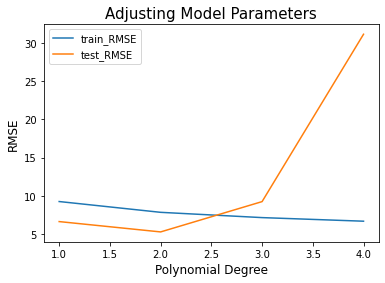

In [60]:
plt.plot(np.arange(1, 5), train_RMSE_list[0:4], label='train_RMSE')
plt.plot(np.arange(1, 5), test_RMSE_list[0:4], label='test_RMSE')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Adjusting Model Parameters', fontsize=15)
plt.legend()

### <span style='color:darkBlue'> **So, as can be seen degree = 2 is best choice for degree of poly features because its error is minimum.**  </span>

## Finalizing Model Parameters:

In [78]:
#desired degree
degree = 3

#Create Polynomial Features
final_poly_converter = PolyFeatures(X, degree)[1]
final_poly_features  = PolyFeatures(X, degree)[0]

#Train the model
final_poly_model = LinearModel(final_poly_features, y)

## Saving the Final Model

In [79]:
dump(final_poly_model, 'HousePrice_PolyModel.joblib')

['HousePrice_PolyModel.joblib']

In [80]:
dump(final_poly_converter, 'Poly_Converter.joblib')

['Poly_Converter.joblib']

In [81]:
def prediction(poly_converter, poly_model, test):
    
    poly_features_test = poly_converter.transform(test)
    
    return poly_model.predict(poly_features_test)

In [82]:
load_converter = load('Poly_Converter.joblib')
load_polymodel = load('HousePrice_PolyModel.joblib')

In [83]:
test = np.matrix(X.iloc[0])

In [84]:
test

matrix([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
          121.54024]])

In [85]:
y[0]

37.9

In [86]:
prediction(load_converter, load_polymodel, test)

C:\Users\Marzie_Thr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Marzie_Thr\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([46.79360873])

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>